# Newtons Law of Cooling
$$
\frac{dT}{dt}(t) = K[M - T]
$$
where 
where 
T is the temperature of the object at time t, M is the temperature of its surroundings, and K is a constant of proportionality greater than 0. 

A classic example is a hot coffee in a room that is cooler than the temperature of the coffee


In [6]:
import numpy as np
from scipy.optimize import fsolve
from typing import Callable


def Newton_cool(T: float, K: float, M: float) -> float:
    """
    Newton Cooling ODE function that returns the derivative of temperature with respect to time.

    Parameters:
    T (float): Temperature of the object.
    M (float): Temperature of the surrounding area.
    K (float): Proportionality constant.

    Returns:
    float: Derivative of temperature with respect to time.
    """
    return K * (M - T)

def true_sol(T0: float, M: float, K: float, t: float) -> float:
    """
    Exact solution of the Newton's Law of Cooling.

    Parameters:
    T0 (float): Initial temperature of the object.
    M (float): Temperature of the surrounding area.
    K (float): Proportionality constant.
    t (float): Time.

    Returns:
    float: Temperature at time t.
    """
    return M + (T0 - M) * np.exp(-K * t)

def euler_method(func: Callable, method: str, T0: float, M: float, K: float, TT: float, h: float) -> np.ndarray:
    """
    Generalized Euler method function to approximate the solution of the ODE using either forward or backward Euler method.

    Parameters:
    func (Callable): Function representing the ODE.
    method (str): Euler method type ('forward' or 'backward').
    T0 (float): Initial temperature.
    M (float): Temperature of the surrounding area.
    K (float): Proportionality constant.
    TT (float): Final time for simulation.
    h (float): Time step.

    Returns:
    np.ndarray: Array of approximated temperatures over time.
    """
    if h <= 0:
        raise ValueError("Time step h must be positive")
    
    num_steps = int(TT / h)
    temperatures = np.zeros(num_steps)
    temperatures[0] = T0

    for i in range(1, num_steps):
        if method == 'forward':
            temperatures[i] = temperatures[i - 1] + h * func(temperatures[i - 1], K, M)
        elif method == 'backward':
            f = lambda y: y - temperatures[i - 1] - h * func(y, K, M)
            temperatures[i] = fsolve(f, temperatures[i - 1])  # Using previous temperature as initial guess
        else:
            raise ValueError("Method must be 'forward' or 'backward'")
    
    return temperatures


# Example usage
T0 = 40  # Initial temperature
M = 25   # Surrounding temperature
K = 2    # Proportionality constant
TT = 10  # Final time
h = 0.01 # Time step

# Approximating using both methods
approx_temps_backward = euler_method(Newton_cool, 'backward', T0, M, K, TT, h)
approx_temps_forward = euler_method(Newton_cool, 'forward', T0, M, K, TT, h)

# Plotting the Results of 
- Eulers method (Explict)
- Eulers method (implicit)
- True Solution

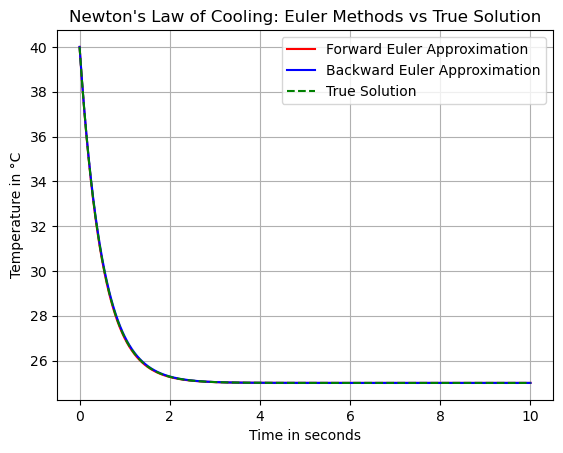

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, TT, len(approx_temps_forward))

# Generate true solution data
true_solution = true_sol(T0, M, K, t)

# Plotting
fig= plt.plot(figsize=(18, 10))


plt.plot(t, approx_temps_forward, color="red", label='Forward Euler Approximation')
plt.plot(t, approx_temps_backward, color='blue', label='Backward Euler Approximation')
plt.plot(t, true_solution, color='green', linestyle='dashed', label='True Solution')
plt.xlabel('Time in seconds')
plt.ylabel('Temperature in °C')
plt.title('Newton\'s Law of Cooling: Euler Methods vs True Solution')
plt.legend()
plt.grid(True)

plt.show()

